In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [11]:
data = pd.read_csv('OnlineRetail.csv', index_col=0, encoding='latin1')

In [15]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [16]:
missing_values = data.isnull().sum()
print(missing_values)

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [17]:
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [18]:
data_grouped = data.groupby(['CustomerID', 'InvoiceDate'])['Description'].apply(list).reset_index()
print(data_grouped)

       CustomerID      InvoiceDate  \
0         12346.0  1/18/2011 10:01   
1         12346.0  1/18/2011 10:17   
2         12347.0  1/26/2011 14:30   
3         12347.0  12/7/2010 14:57   
4         12347.0   4/7/2011 10:43   
...           ...              ...   
13166     18283.0  6/14/2011 11:41   
13167     18283.0  6/23/2011 19:20   
13168     18283.0  7/14/2011 13:00   
13169     18283.0  7/14/2011 13:20   
13170     18287.0  5/22/2011 10:39   

                                             Description  
0                       [MEDIUM CERAMIC TOP STORAGE JAR]  
1                       [MEDIUM CERAMIC TOP STORAGE JAR]  
2      [PINK NEW BAROQUECANDLESTICK CANDLE, BLUE NEW ...  
3      [BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ...  
4      [AIRLINE BAG VINTAGE JET SET WHITE, AIRLINE BA...  
...                                                  ...  
13166  [WHITE HANGING HEART T-LIGHT HOLDER, DOILEY ST...  
13167  [TRADITIONAL WOODEN SKIPPING ROPE, 4 TRADITION...  
13168  [BOX 

In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(data_grouped['Description']).transform(data_grouped['Description'])
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)## usually between 0.01-0.05
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                                           itemsets
0    0.014502                 ( SET 2 TEA TOWELS I LOVE LONDON )
1    0.011009                           (10 COLOUR SPACEBOY PEN)
2    0.011389              (12 PENCILS SMALL TUBE RED RETROSPOT)
3    0.013742                      (12 PENCILS SMALL TUBE SKULL)
4    0.018374                 (3 HOOK PHOTO SHELF ANTIQUE WHITE)
..        ...                                                ...
750  0.013135  (LUNCH BAG SPACEBOY DESIGN , LUNCH BAG RED RET...
751  0.010629  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
752  0.013135  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...
753  0.011996  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...
754  0.010174  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...

[755 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


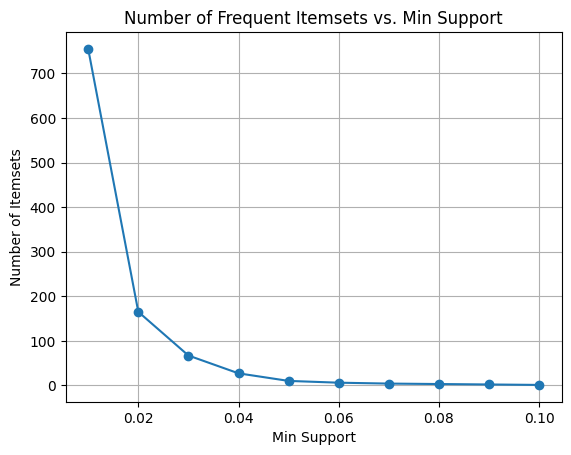

In [26]:
import matplotlib.pyplot as plt

support_values = []
itemset_counts = []

for support in range(1, 11):
    min_support = support / 100
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    support_values.append(min_support)
    itemset_counts.append(len(frequent_itemsets))

plt.plot(support_values, itemset_counts, marker='o')
plt.title('Number of Frequent Itemsets vs. Min Support')
plt.xlabel('Min Support')
plt.ylabel('Number of Itemsets')
plt.grid(True)
plt.show()

In [34]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(data_grouped['Description']).transform(data_grouped['Description'])
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)## usually between 0.01-0.05
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                                           itemsets
0    0.032420                           (6 RIBBONS RUSTIC CHARM)
1    0.033559                      (60 TEATIME FAIRY CAKE CASES)
2    0.024372                   (72 SWEETHEART FAIRY CAKE CASES)
3    0.030446                       (ALARM CLOCK BAKELIKE GREEN)
4    0.022170                      (ALARM CLOCK BAKELIKE ORANGE)
..        ...                                                ...
160  0.022625      (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND)
161  0.022246  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...
162  0.020424  (RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI...
163  0.022322  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...
164  0.020120  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...

[165 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


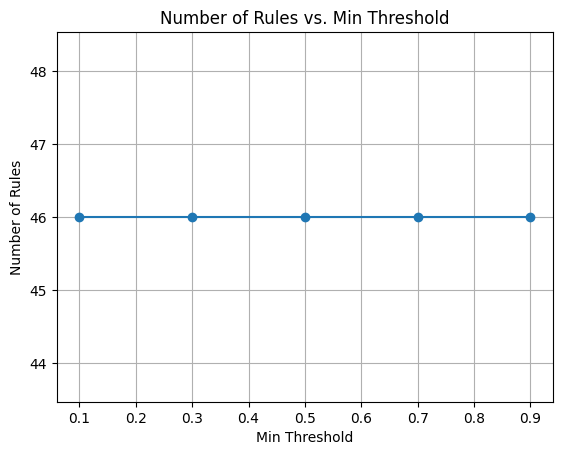

In [35]:
min_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
rule_counts = []

for threshold in min_thresholds:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=threshold)
    rule_counts.append(len(rules))

plt.plot(min_thresholds, rule_counts, marker='o')
plt.xlabel('Min Threshold')
plt.ylabel('Number of Rules')
plt.title('Number of Rules vs. Min Threshold')
plt.grid(True)
plt.show()

In [39]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)#
print(rules)

                                          antecedents  \
0                               (SPACEBOY LUNCH BOX )   
1                              (DOLLY GIRL LUNCH BOX)   
2                    (PINK REGENCY TEACUP AND SAUCER)   
3                   (GREEN REGENCY TEACUP AND SAUCER)   
4                  (ROSES REGENCY TEACUP AND SAUCER )   
5                   (GREEN REGENCY TEACUP AND SAUCER)   
6                             (HEART OF WICKER SMALL)   
7                             (HEART OF WICKER LARGE)   
8                           (JUMBO BAG PINK POLKADOT)   
9                           (JUMBO BAG RED RETROSPOT)   
10                             (JUMBO BAG STRAWBERRY)   
11                          (JUMBO BAG RED RETROSPOT)   
12                           (JUMBO STORAGE BAG SUKI)   
13                          (JUMBO BAG RED RETROSPOT)   
14                          (LUNCH BAG RED RETROSPOT)   
15                          (JUMBO BAG RED RETROSPOT)   
16                          (LU

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


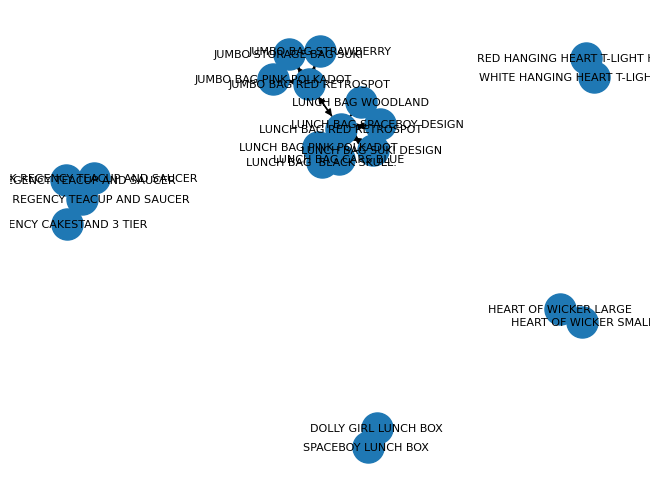

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for index, row in rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    G.add_nodes_from(antecedents)
    G.add_nodes_from(consequents)
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


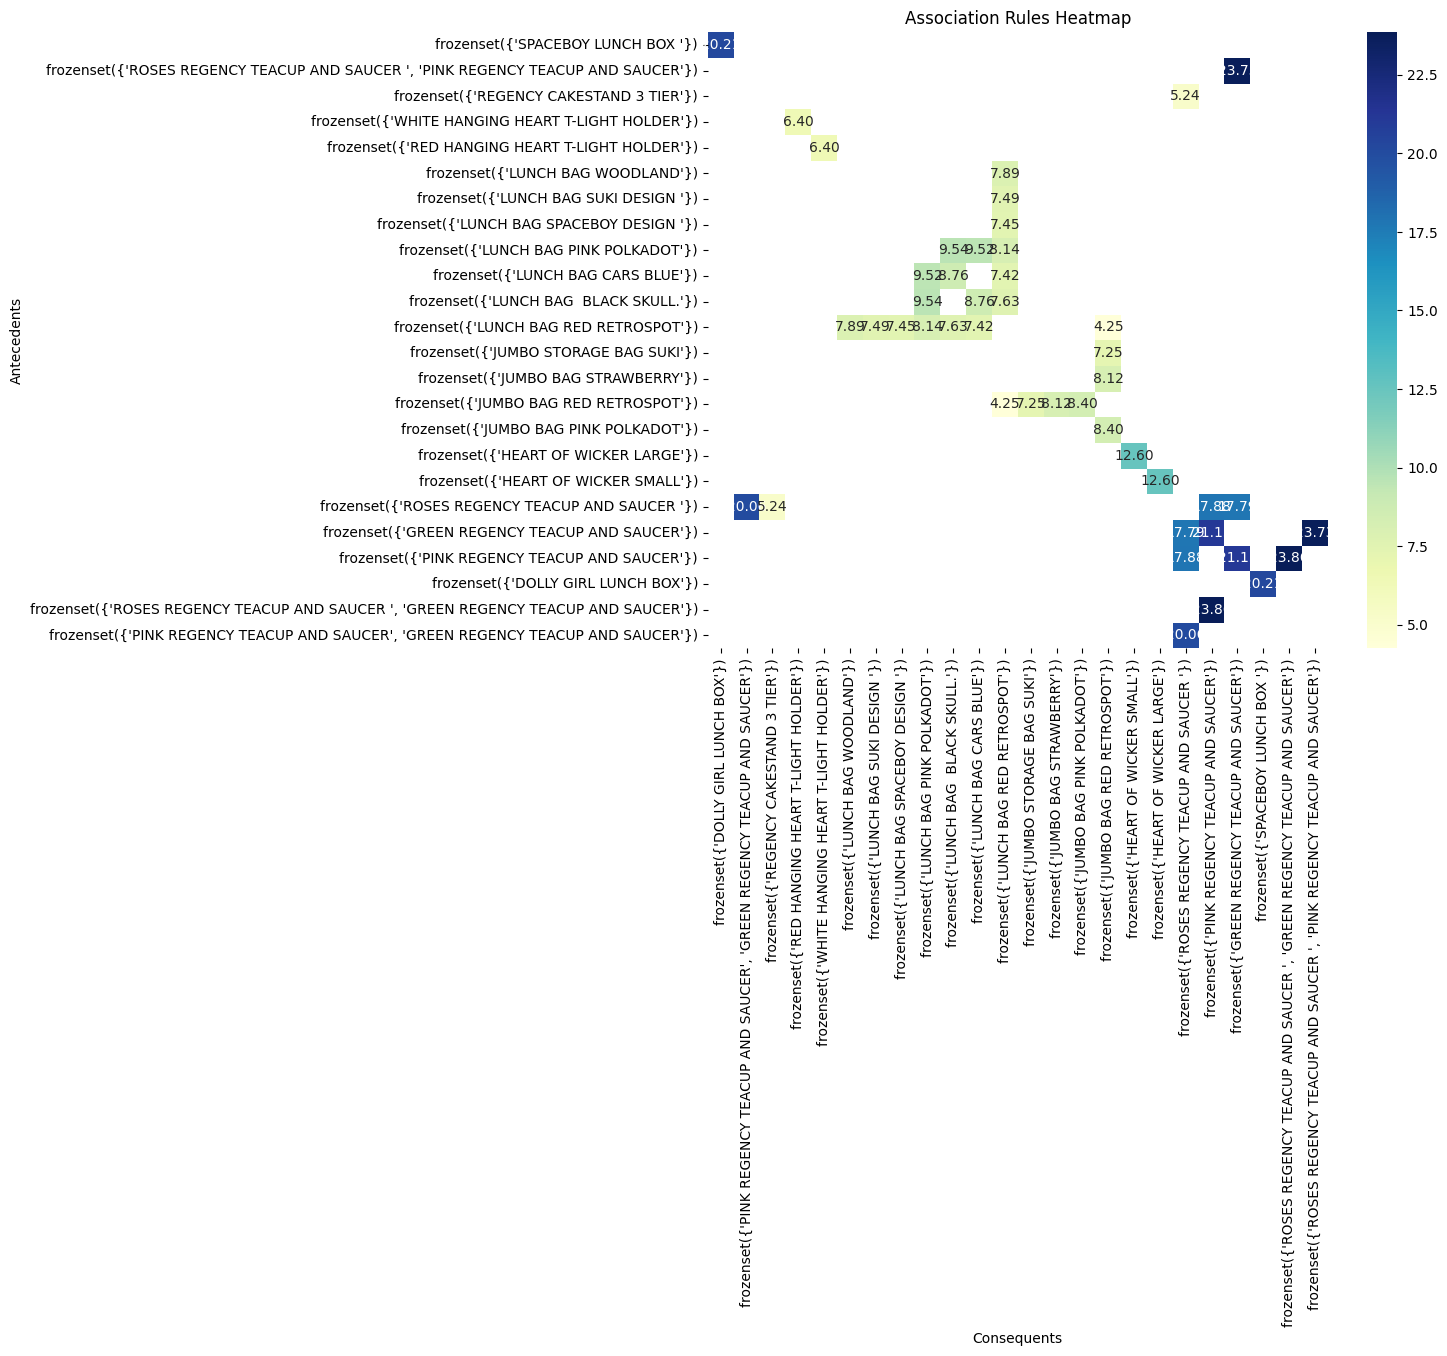

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Association Rules Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()